# Importing necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import fashion_mnist

# Loading dataset

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [5]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
print(x_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

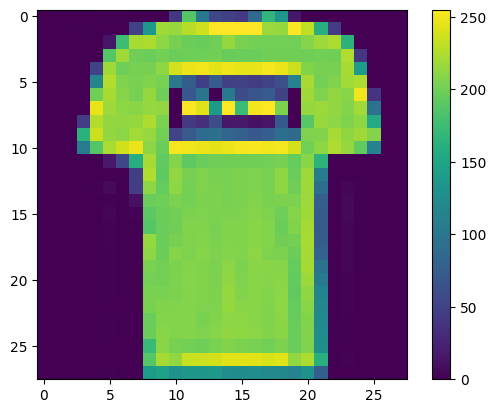

In [8]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Scaling the values in the range of 0 to 1

In [9]:
x_test=x_test/255.0
x_train=x_train/255.0

## Displaying first 10 images with class

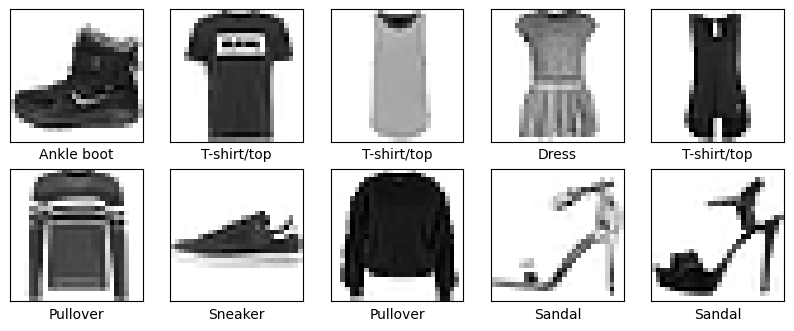

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


# Building Neural Network Model

## Setting up layers

In [11]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(10,)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 800650 (3.05 MB)
Trainable params: 800650 

## Compiling and fitting

In [13]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)


Epoch 1/20
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4917 - accuracy: 0.8207
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3841 - accuracy: 0.8612
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3450 - accuracy: 0.8729
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3248 - accuracy: 0.8809
Epoch 5/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3040 - accuracy: 0.8870
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2907 - accuracy: 0.8919
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2802 - accuracy: 0.8964
Epoch 8/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2699 - accuracy: 0.8985
Epoch 9/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2631 - accuracy: 0.9018
Epoch 10/20
1875/1875 [==============================] - 26s 14m

In [14]:
loss,acc=model.evaluate(x_test,y_test)
print(loss,acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3875 - accuracy: 0.8876
0.38747134804725647 0.8876000046730042


### Training set accuracy- 92.46%
### Test set accuracy- 88.76%

# Making Predictions

In [15]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [18]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

[1.8644747e-14 1.0899841e-15 1.4178752e-16 8.9571805e-12 7.6906434e-13
 2.5693785e-06 4.7658931e-13 6.1255258e-07 3.1437743e-12 9.9999678e-01]
9
9


In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

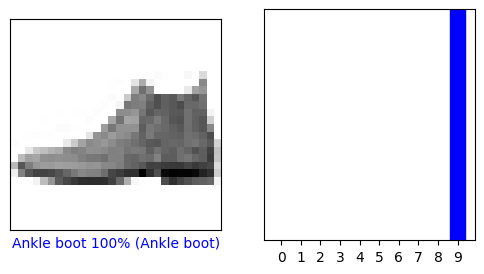

In [23]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],y_test,x_test)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],y_test)
plt.show()
